In [110]:
import cv2
import numpy as np
import pandas as pd
import os
import sys
import time
import matplotlib.pyplot as plt


In [118]:
checkboard = cv2.imread('./calib-object.jpg')
checkboard = cv2.cvtColor(checkboard, cv2.COLOR_BGR2RGB)

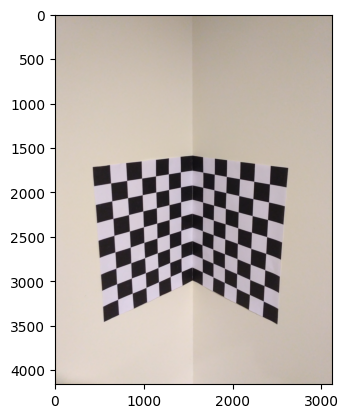

In [119]:
plt.imshow(checkboard, cmap='gray')

In [18]:
edges = cv2.Canny(checkboard, 150, 200)

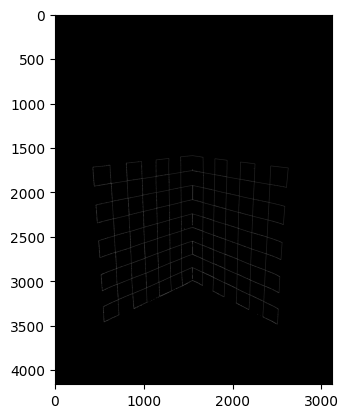

In [19]:
plt.imshow(edges, cmap='gray')

In [64]:
# import cv2
# import numpy as np
# import math

# # Load the image
# image = cv2.imread('./calib-object.jpg')

# # Convert the image to gray scale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Perform edge detection
# edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# # Perform a Hough Line Transform
# lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=10, maxLineGap=250)
# # lines = cv2.HoughLines(edges, 1, np.pi / 180, 100, None, 0,0)

# # # Draw lines on the image
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# # if lines is not None:
# #     for i in range(0, len(lines)):
# #         rho = lines[i][0][0]
# #         theta = lines[i][0][1]
# #         a = math.cos(theta)
# #         b = math.sin(theta)
# #         x0 = a * rho
# #         y0 = b * rho
# #         pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
# #         pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
# #         cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


# # Show the image
# plt.imshow(image)

In [109]:
checkboard_split_left = cv2.cvtColor(cv2.imread('./calib-object.jpg'), cv2.COLOR_BGR2RGB)
checkboard_split_left = checkboard_split_left[:, 0:checkboard_split_left.shape[1]//2]
ret, corners1 = cv2.findChessboardCorners(checkboard_split_left, (6,8),None)

In [108]:
checkboard_split_right = cv2.cvtColor(cv2.imread('./calib-object.jpg'), cv2.COLOR_BGR2RGB)
checkboard_split_right = checkboard_split_right[:, checkboard_split_right.shape[1]//2:]
ret2, corners2 = cv2.findChessboardCorners(checkboard_split_right, (6,8),None)


In [112]:

corners2 = corners2 + np.array([checkboard_split_left.shape[1], 0])

In [113]:
corners = np.concatenate((corners1, corners2))

In [120]:

#make a copy of an image to tt
tt = checkboard.copy()
for i in corners:
    cv2.circle(tt,(int(i[0][0]), int(i[0][1])),50,(0,255,0),-1)

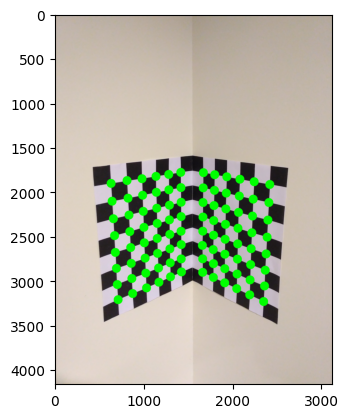

In [121]:
plt.imshow(tt)

In [75]:
print(len(corners))
print(len(corners2))

48
48
